In [1]:
import numpy as np
import scipy.spatial
import scipy.optimize

import matplotlib.pyplot as plt

# Since the solution has such a stupid name, we need a hack to import it
solution = __import__('04_cubic_ufo')
rotate_points = solution.rotate_points
project_points = solution.project_points
hull_area = solution.hull_area_without_scipy


In [2]:
corners = np.array([
    [-.5, +.5, -.5],
    [+.5, +.5, -.5],
    [+.5, -.5, -.5],
    [+.5, -.5, +.5],
    [-.5, -.5, +.5],
    [-.5, +.5, +.5],
    [-.5, -.5, -.5],
    [+.5, +.5, +.5],
])

In [4]:
pitch = 45/180*np.pi
area = hull_area(project_points(rotate_points(corners, 0, pitch, 0)))
area

0.9999999999999998

# After a 45-degree y-rotation, an x-rotation between 0 and 90 covers all possible values for the area

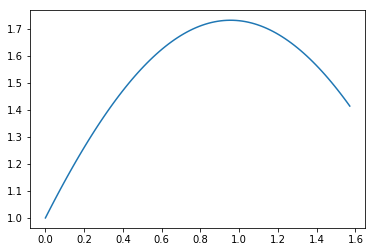

In [9]:
pitch = 45/180*np.pi
yaw = 0
roll_angles = np.linspace(0, 90/180*np.pi, 100)
areas = np.zeros(roll_angles.shape)
for i, roll in enumerate(roll_angles):
    areas[i] = hull_area(project_points(rotate_points(corners, roll, pitch, yaw))[:6,:])

plt.plot(roll_angles, areas)

# If we order the corners cleverly, the first 6 corners form a hexagon

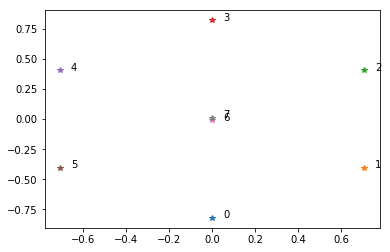

In [10]:
points = rotate_points(corners, 54/180*np.pi, 45/180*np.pi, 0)[:, [0, 2]]
for i, point in enumerate(points):
    plt.plot(point[0], point[1], '*')
    plt.text(point[0] + .05, point[1] , str(i))